In [1]:
import pywt
from matplotlib import pyplot as plt
from data_handling import data_loader
import utils
from signal_decomposition import wavelet, modwt
import pandas as pd
import numpy as np

In [2]:
df = data_loader.load_mavir_data('./data/mavir_data/mavir.csv')

In [3]:
# standardize power
df['Power'] = utils.standardize(df['Power'])

# chose the first n datapoints as a sample
sample = utils.sample(df, 6*24, start_idx=0)

In [4]:
coefs = modwt.modwt(sample['Power'].to_numpy(), 'haar', 5)
coefs = modwt.modwtmra(coefs, 'haar')

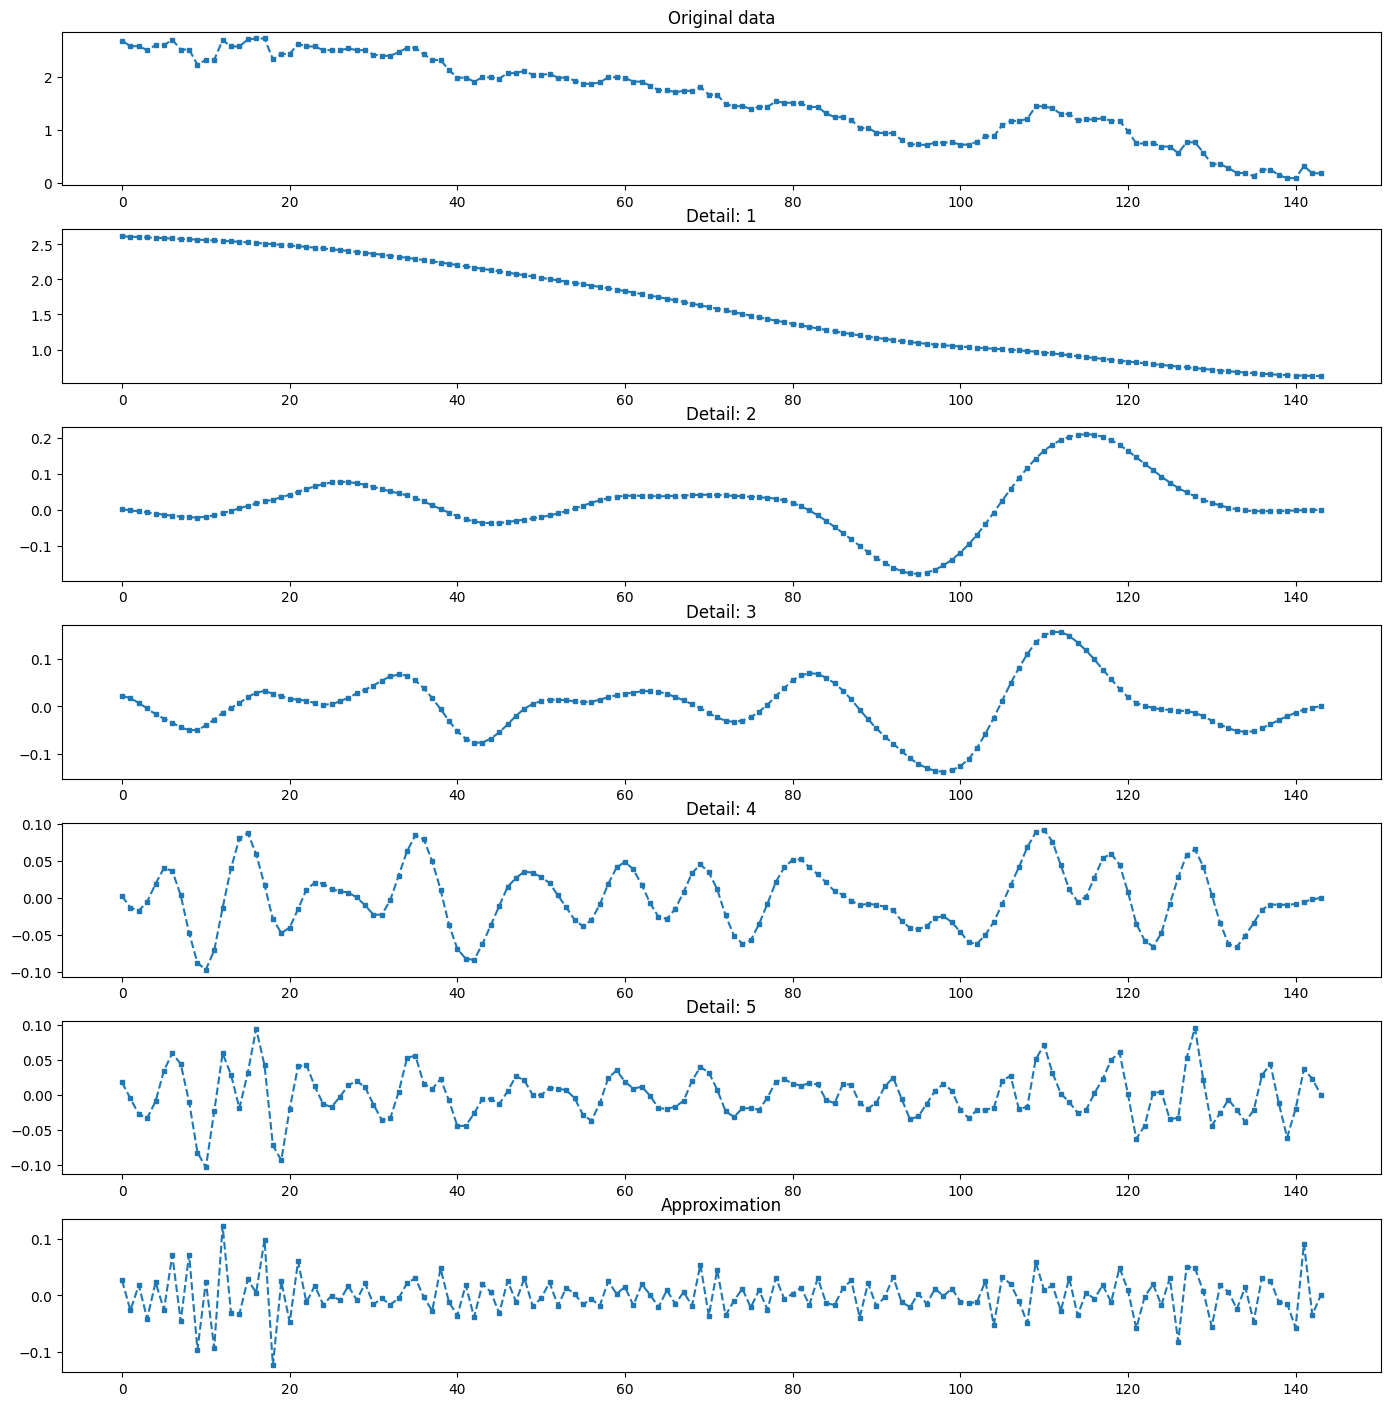

In [5]:
plt.rcParams['figure.figsize'] = [14, 14]

fig, axs = plt.subplots(len(coefs) + 1)
fig.tight_layout()

axs[0].plot(sample['Power'], marker='s', linestyle='--', markersize=3)
axs[0].set_title('Original data')

for idx, (ax, det) in enumerate(zip(axs[1:-1], reversed(coefs[1:]))):
    ax.plot(det, marker='s', linestyle='--', markersize=3)
    ax.set_title(f'Detail: {idx + 1}')

axs[-1].plot(coefs[0], marker='s', linestyle='--', markersize=3)
axs[-1].set_title('Approximation')

plt.show()

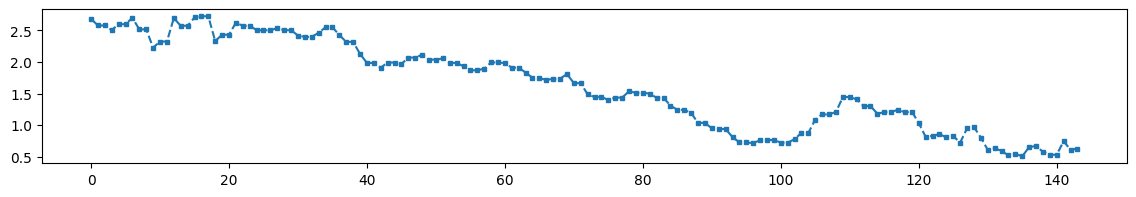

In [9]:
plt.rcParams['figure.figsize'] = [14, 2]

rec = coefs.sum(0)

plt.plot(rec, marker='s', linestyle='--', markersize=3)

plt.show()